<a href="https://colab.research.google.com/github/nitinnkdz/Bankning-Crisis/blob/main/Banking_Crisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset is a derivative of Reinhart et. al's Global Financial Stability dataset which can be found online at: https://www.hbs.edu/behavioral-finance-and-financial-stability/data/Pages/global.aspx
*italicized text*

The dataset specifically focuses on the Banking, Debt, Financial, Inflation and Systemic Crises that occurred, from **1860 to 2014**, in **13 African countries**, including: **Algeria, Angola, Central African Republic, Ivory Coast, Egypt, Kenya, Mauritius, Morocco, Nigeria, South Africa, Tunisia, Zambia and Zimbabw

In [7]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from matplotlib import *
import sys
from pylab import *

In [20]:
#Create a dataframe to read the dataset
df = pd.read_csv('african_crises.csv')

In [3]:
#Print the required columns of the Dataset
for col in df.columns: 
    print(col)

case
cc3
country
year
systemic_crisis
exch_usd
domestic_debt_in_default
sovereign_external_debt_default
gdp_weighted_default
inflation_annual_cpi
independence
currency_crises
inflation_crises
banking_crisis


In [4]:
#Preprocessing
df['banking_crisis'] = df['banking_crisis'].replace('crisis',np.nan)
df['banking_crisis'] = df['banking_crisis'].fillna(1)
df['banking_crisis'] = df['banking_crisis'].replace('no_crisis',np.nan)
df['banking_crisis'] = df['banking_crisis'].fillna(0)
df.drop(['cc3','country'], axis=1, inplace=True)

In [8]:
#scalling the features of the data
df_scaled = preprocessing.scale(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled['banking_crisis'] = df['banking_crisis']
df = df_scaled

In [9]:

X = df.loc[:,df.columns != 'banking_crisis']
y = df.loc[:, 'banking_crisis']

In [11]:
#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
# Initialising the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(32, activation = 'sigmoid', input_dim = 11))
# Adding the second hidden layer
classifier.add(Dense(32, activation = 'sigmoid'))
# Adding the third hidden layer
classifier.add(Dense(8, activation = 'sigmoid'))
# Adding the output layer
classifier.add(Dense(1, activation = 'sigmoid'))
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#Fitting the model
classifier.fit(X_train, y_train, epochs=200)

Epoch 1/200
27/27 [==============================] - 14s 2ms/step - loss: 0.5111 - accuracy: 0.9183
Epoch 2/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3746 - accuracy: 0.9198
Epoch 3/200
27/27 [==============================] - 0s 1ms/step - loss: 0.3341 - accuracy: 0.9077
Epoch 4/200
27/27 [==============================] - 0s 1ms/step - loss: 0.3216 - accuracy: 0.9033
Epoch 5/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3002 - accuracy: 0.9108
Epoch 6/200
27/27 [==============================] - 0s 2ms/step - loss: 0.2622 - accuracy: 0.9272
Epoch 7/200
27/27 [==============================] - 0s 2ms/step - loss: 0.2782 - accuracy: 0.9172
Epoch 8/200
27/27 [==============================] - 0s 2ms/step - loss: 0.2675 - accuracy: 0.9208
Epoch 9/200
27/27 [==============================] - 0s 2ms/step - loss: 0.2906 - accuracy: 0.9074
Epoch 10/200
27/27 [==============================] - 0s 2ms/step - loss: 0.2642 - accuracy: 0.9174
Epoch 11

In [16]:
#Scoring of Model
scores = classifier.evaluate(X_train, y_train)
print ("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = classifier.evaluate(X_test, y_test)
print ("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

27/27 [==============================] - 1s 1ms/step - loss: 0.0635 - accuracy: 0.9847
Training Accuracy: 98.47%

7/7 [==============================] - 0s 2ms/step - loss: 0.1058 - accuracy: 0.9670
Testing Accuracy: 96.70%



In [18]:
#Prediction of Results
y_pred = np.argmax(classifier.predict(X_test), axis=-1)

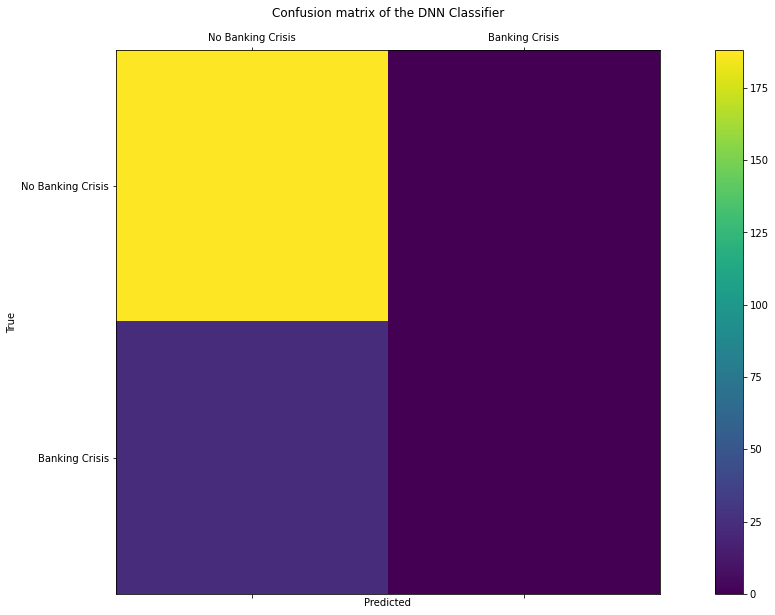

In [19]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['No Banking Crisis', 'Banking Crisis']
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the DNN Classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()